In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import re
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer
pd.options.display.max_rows = 100
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('fr.openfoodfacts.org.products.csv',sep = '\t',low_memory=False)
df.describe()


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [3]:

df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [4]:
df.drop(columns=['url', 'creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime','countries','countries_tags','countries_fr','image_url','image_small_url','states','states_tags','states_fr'],inplace=True)
cols_to_drop = df.filter(regex='_n$').columns
df.drop(columns=cols_to_drop, inplace=True)
cols_to_drop = df.filter(regex='^state').columns

df.drop(columns=cols_to_drop, inplace=True)

<Axes: >

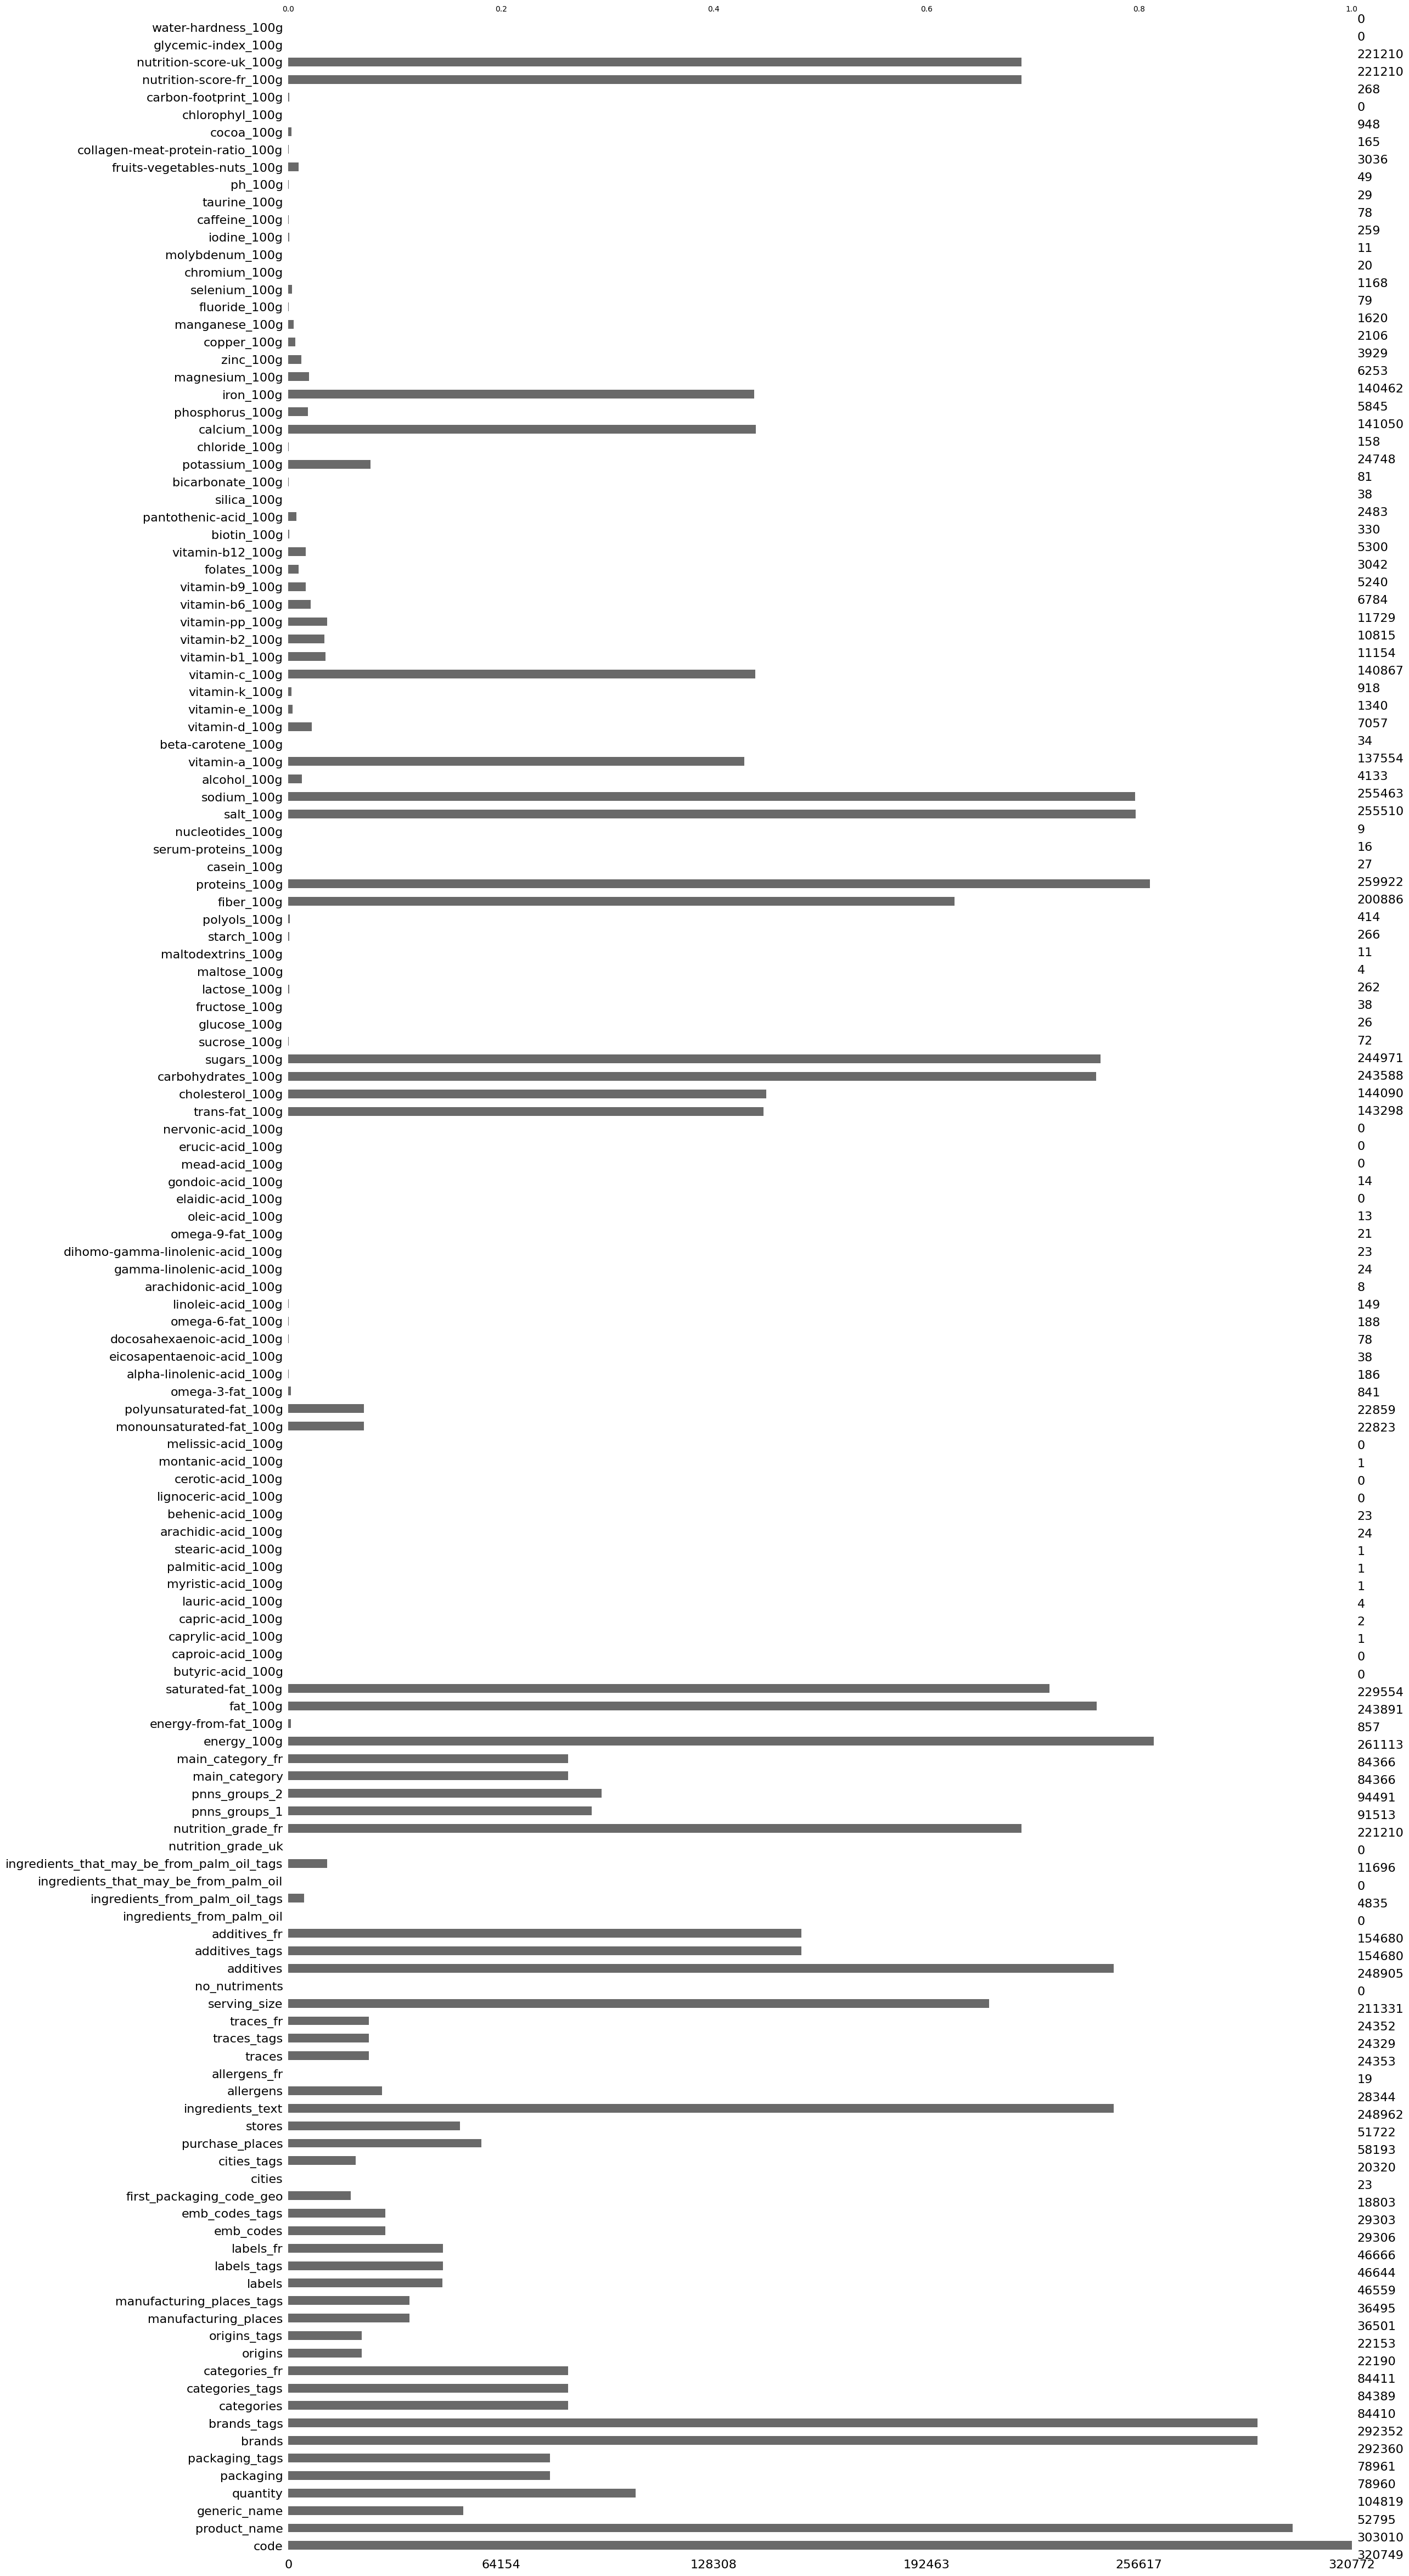

In [5]:
msno.bar(df)

In [6]:

# Calculer le nombre total de lignes
total_rows = len(df)

# Calculer le nombre de valeurs non nulles dans chaque colonne
non_null_counts = df.notna().sum()

# Calculer le taux de remplissage de chaque colonne
filling_rates = non_null_counts / total_rows * 100
filling_rates

# Filtrer les colonnes avec un taux de remplissage entre 20% et 50%
selected_columns = filling_rates[(filling_rates >= 5) ].index
selected_columns
# Conserver uniquement les colonnes sélectionnées
df_cleaned = df[selected_columns]
len(df_cleaned)

320772

<Axes: >

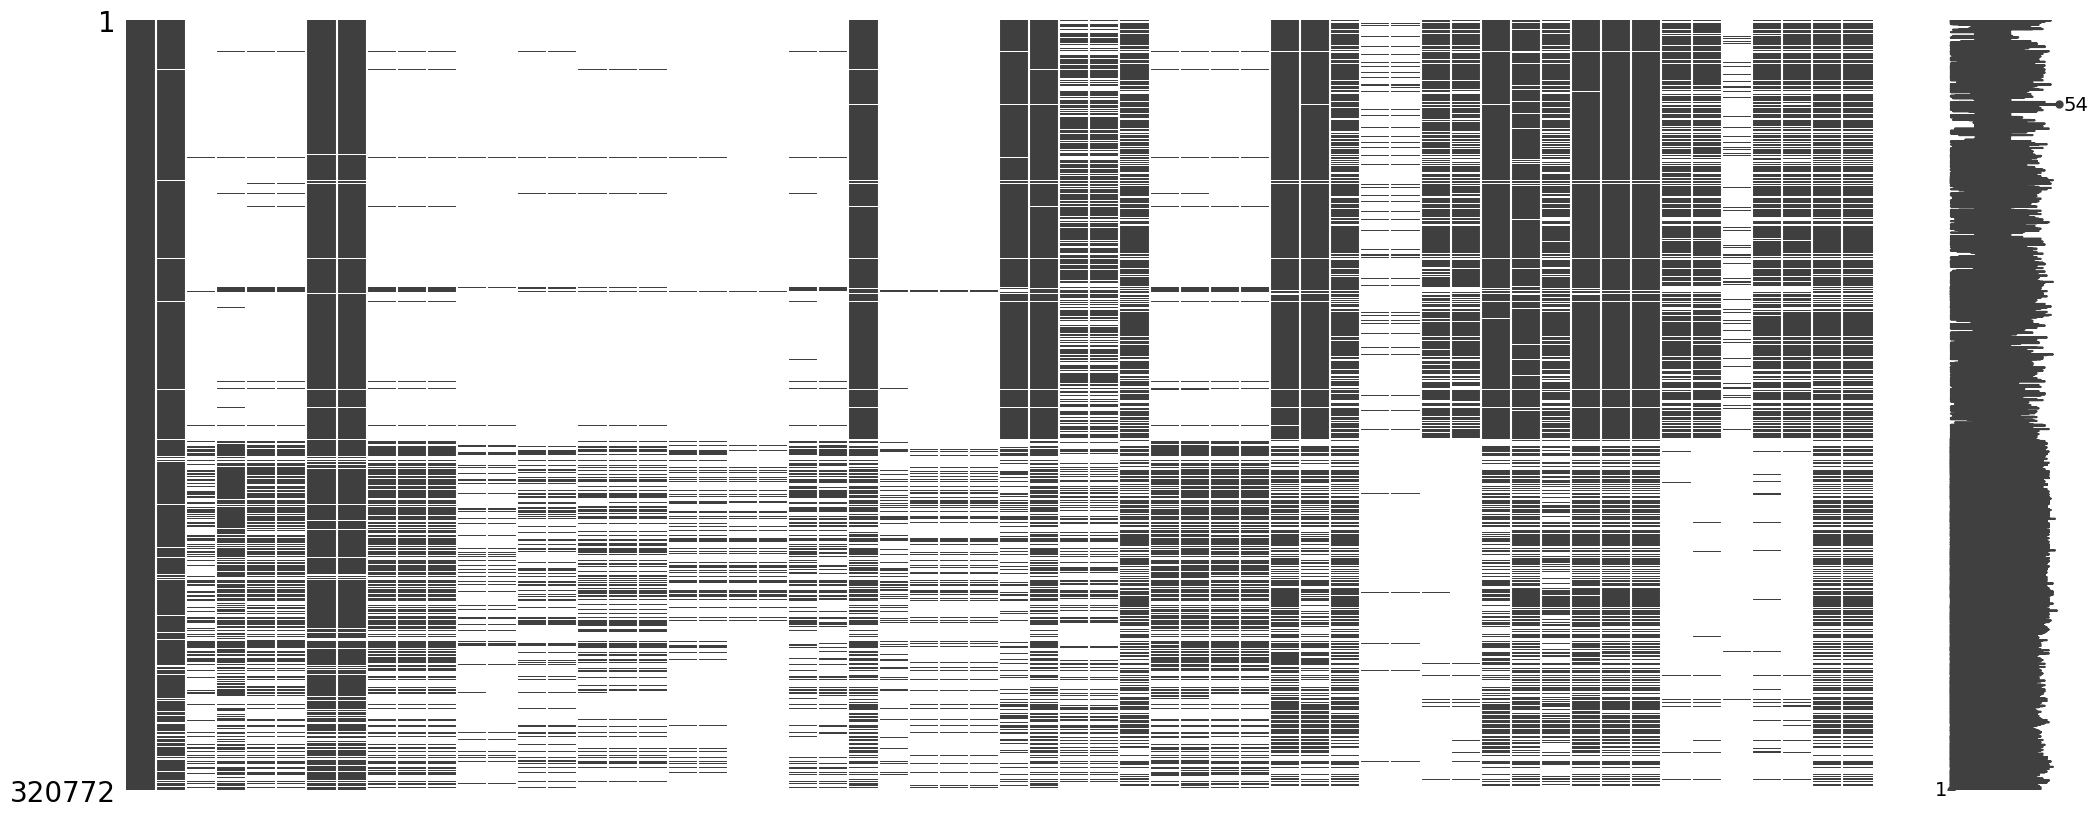

In [7]:
msno.matrix(df_cleaned)

In [8]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])
df_pnns1 = df_cible['pnns_groups_1']

In [9]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()

pnns_groups_1
unknown                    22624
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64


In [33]:
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"-":" "},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned.pnns_groups_1.replace({"Unknown":np.nan},regex=True)
df_cleaned['pnns_groups_1']=df_cleaned['pnns_groups_1'].str.capitalize()
df_cleaned['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks              10865
Milk and dairy products     7336
Cereals and potatoes        7152
Fish meat eggs              6980
Beverages                   6825
Fruits and vegetables       6032
Composite foods             6025
Fat and sauces              4226
Salty snacks                2394
Name: count, dtype: int64

<Axes: >

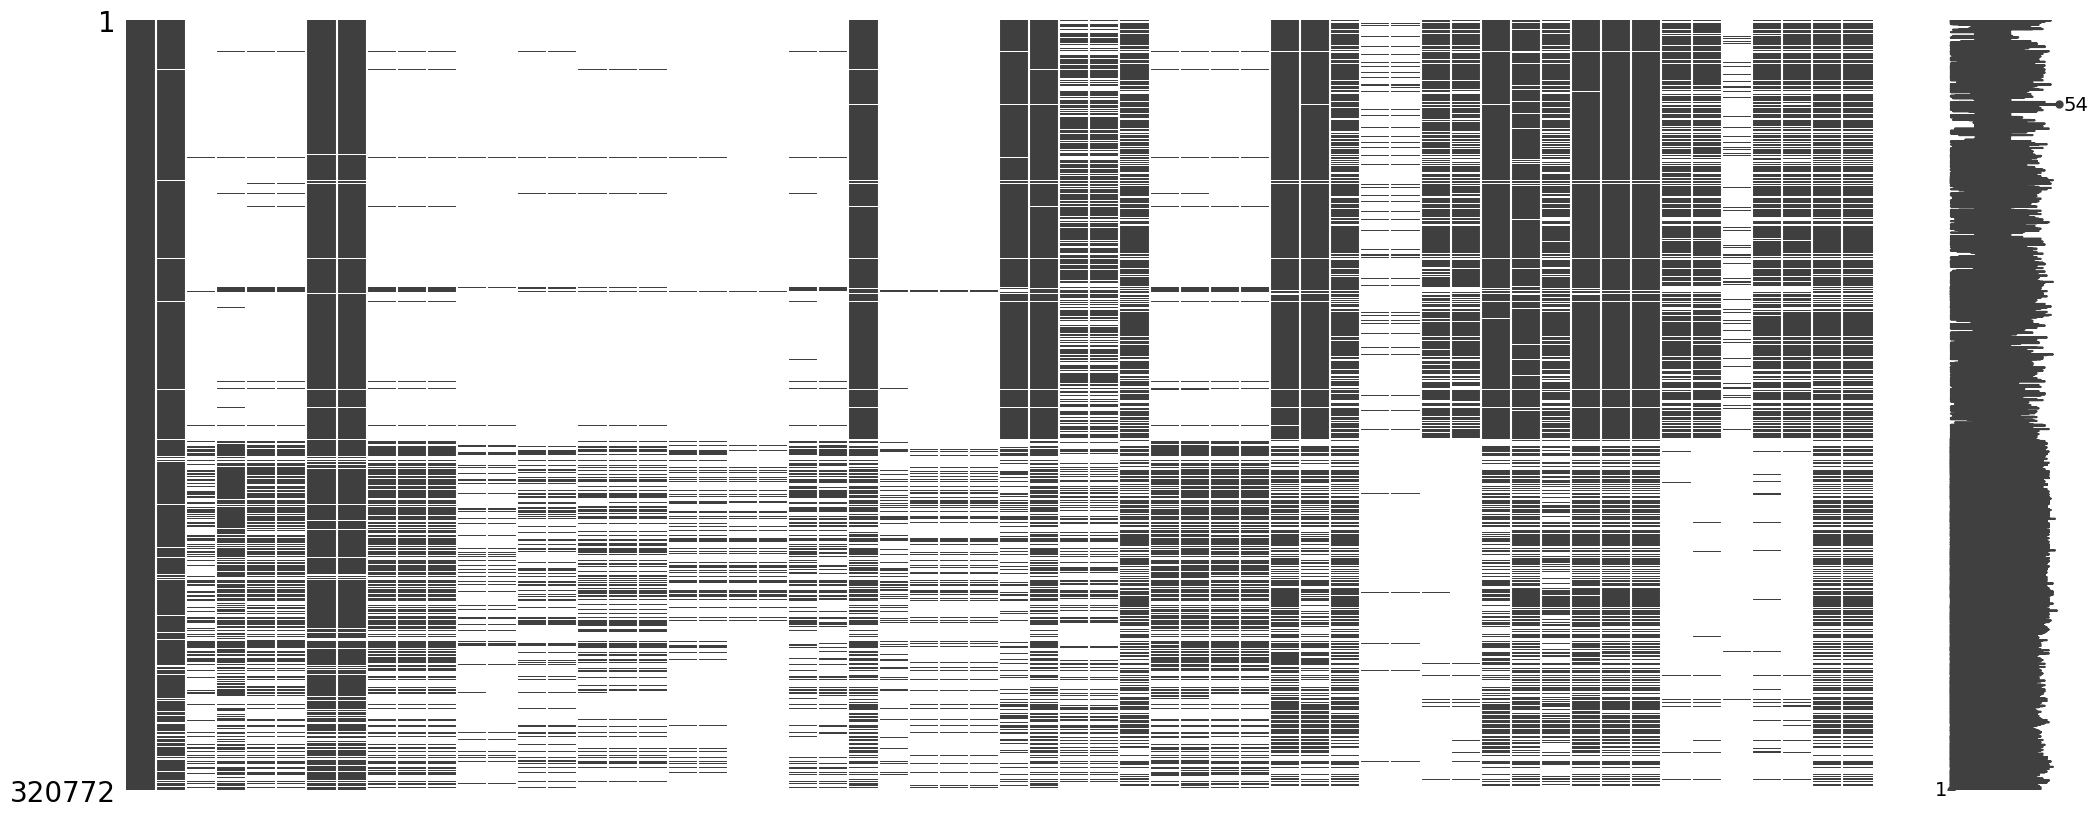

In [11]:
msno.matrix(df_cleaned)

In [12]:
df_cible=df_cleaned.dropna(subset=['pnns_groups_1'])

In [35]:
df_pnns1 = df_cleaned['pnns_groups_1']

In [36]:
counts = df_pnns1.value_counts().reset_index()
counts.columns = ['pnns_groups_1', 'Counts']
print(df_pnns1.value_counts())
# Créer le graphique avec Plotly
fig = px.bar(counts, x='pnns_groups_1', y='Counts', title='Value Counts de la variable pnns_groups_1')

# Afficher le graphique
fig.show()


pnns_groups_1
Sugary snacks              10865
Milk and dairy products     7336
Cereals and potatoes        7152
Fish meat eggs              6980
Beverages                   6825
Fruits and vegetables       6032
Composite foods             6025
Fat and sauces              4226
Salty snacks                2394
Name: count, dtype: int64


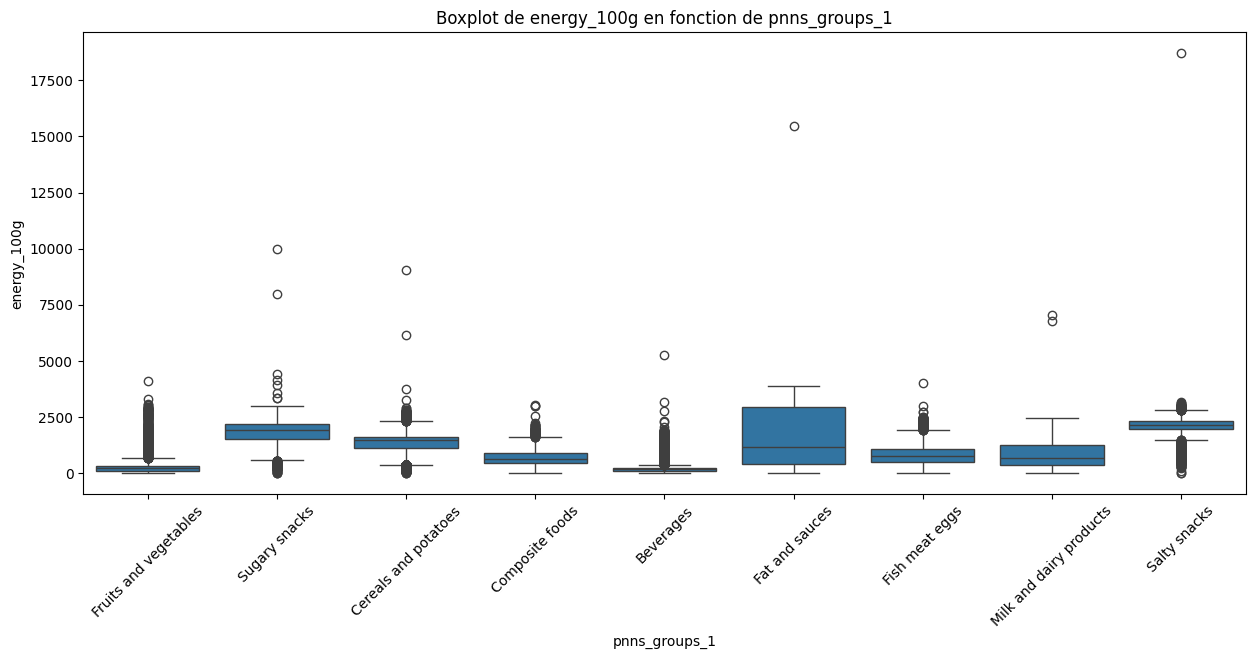

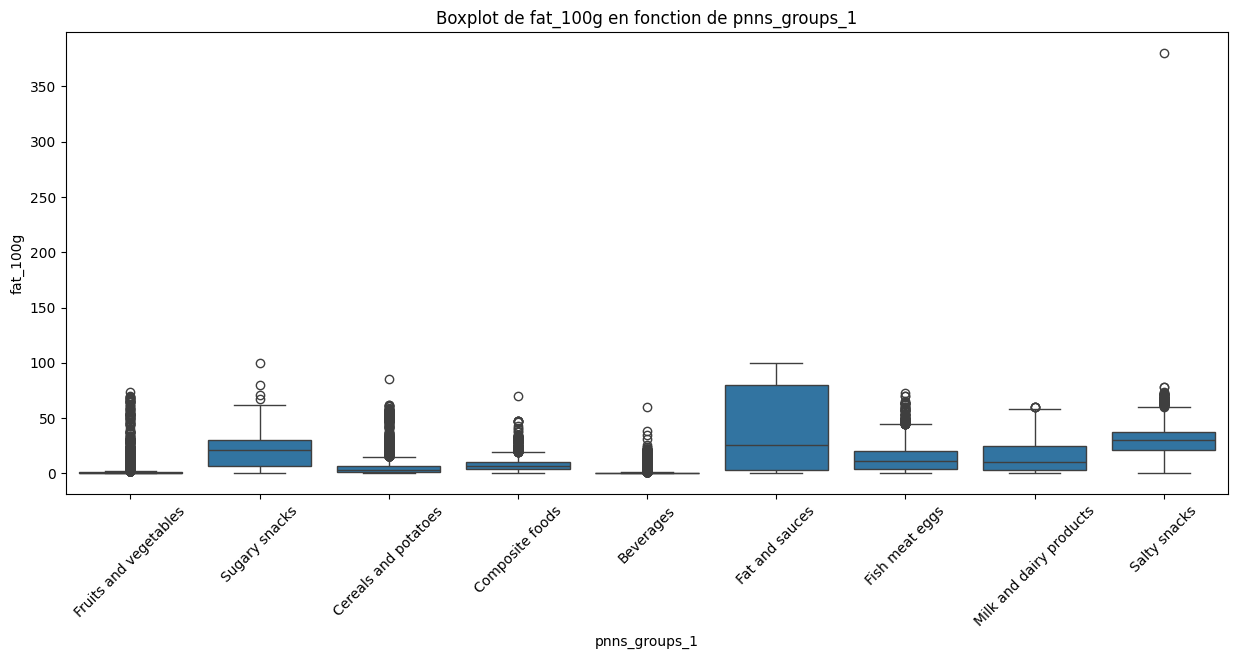

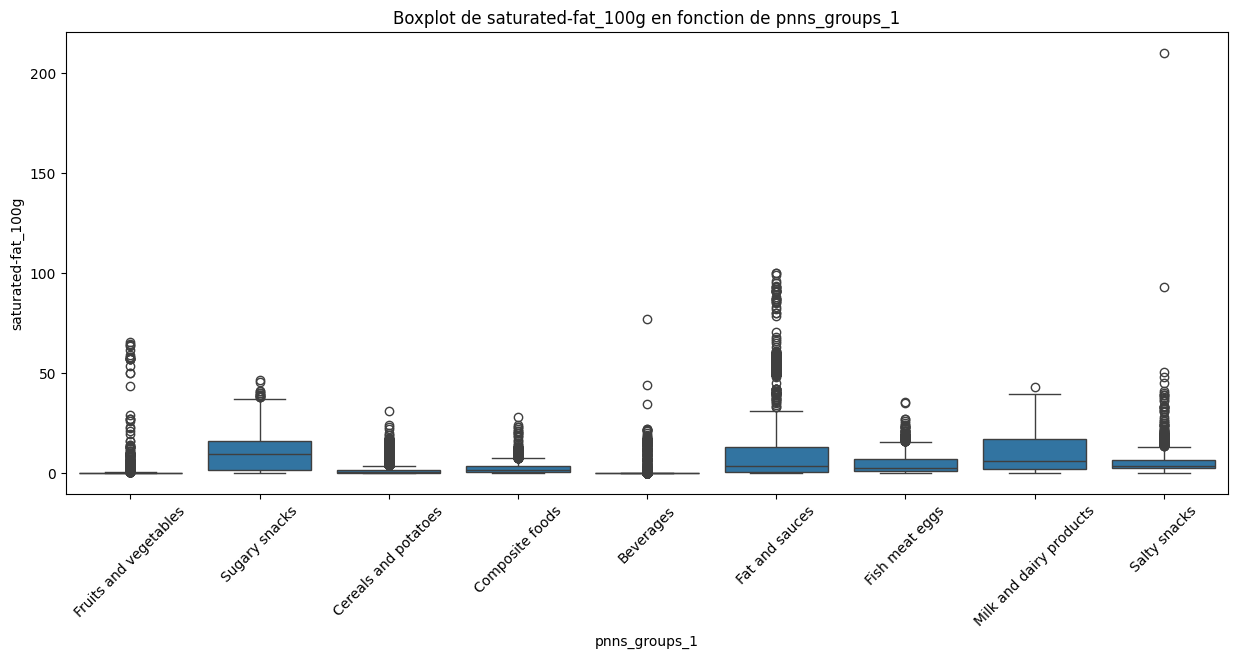

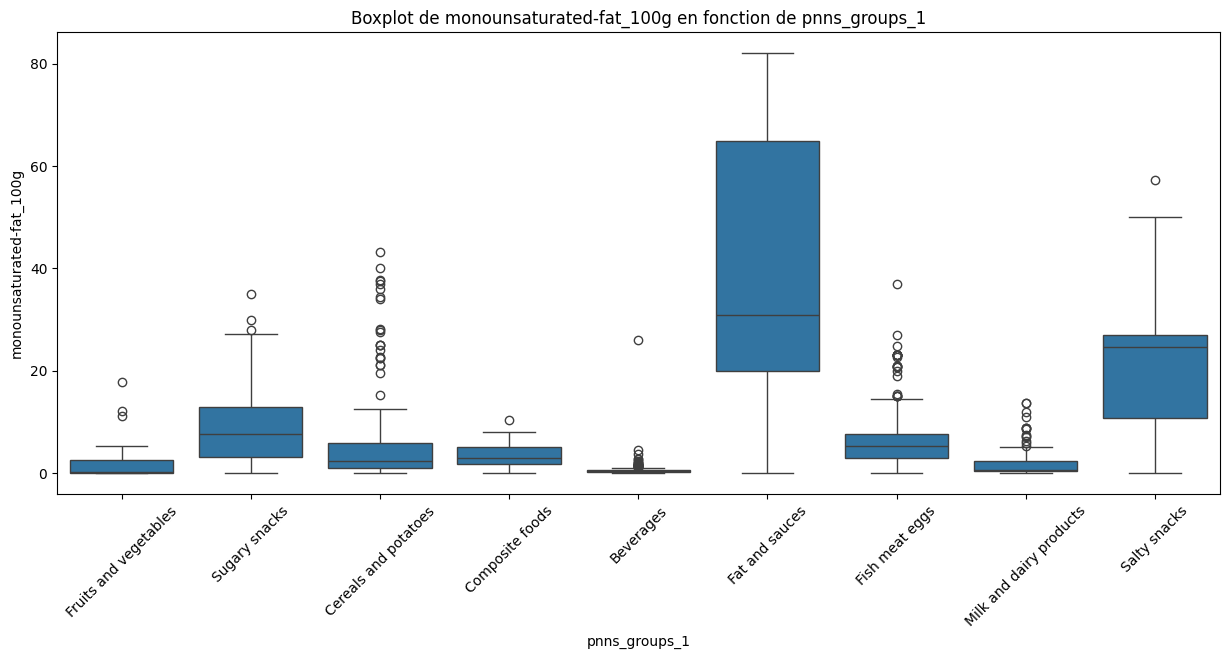

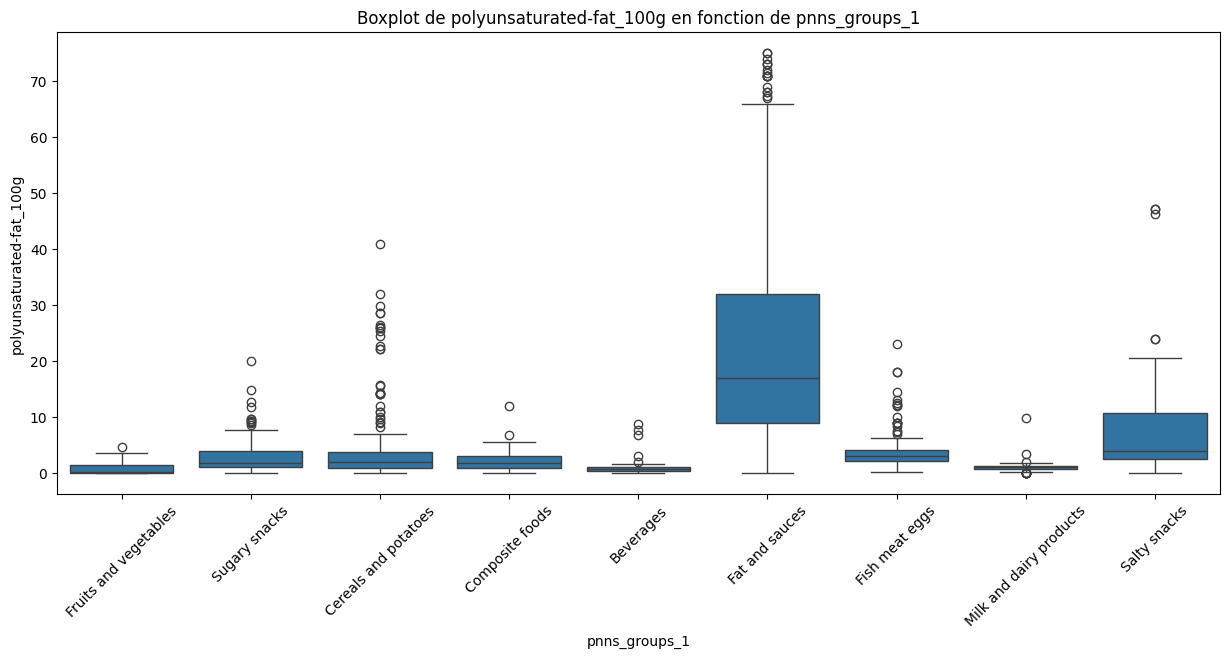

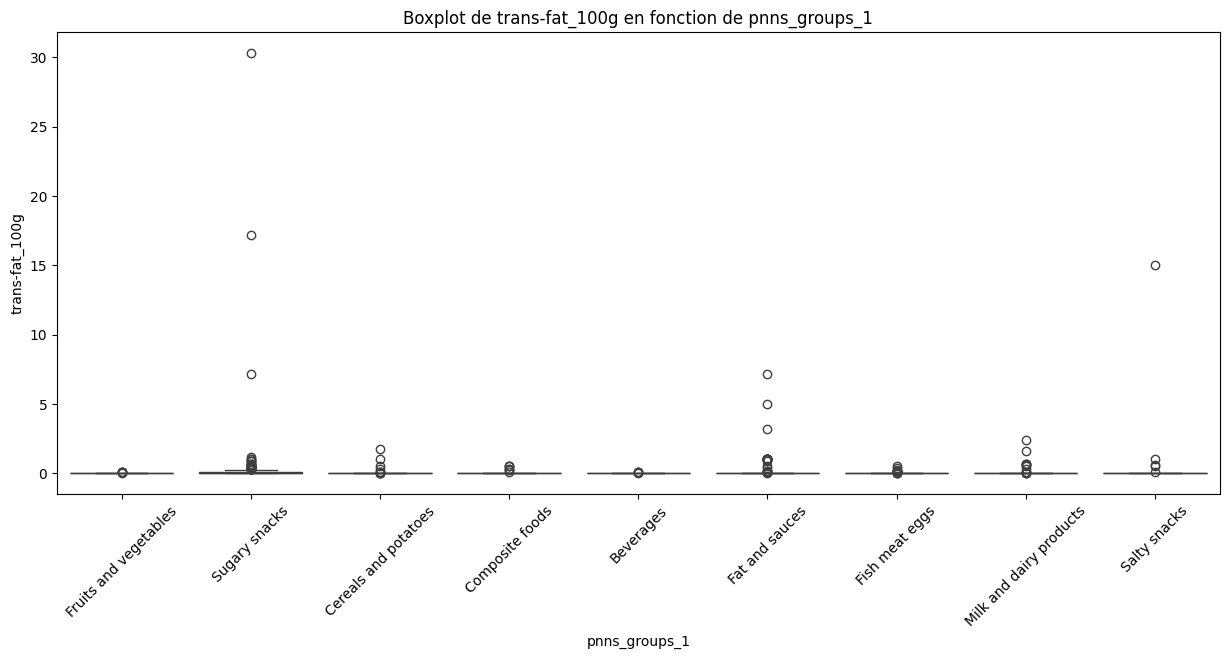

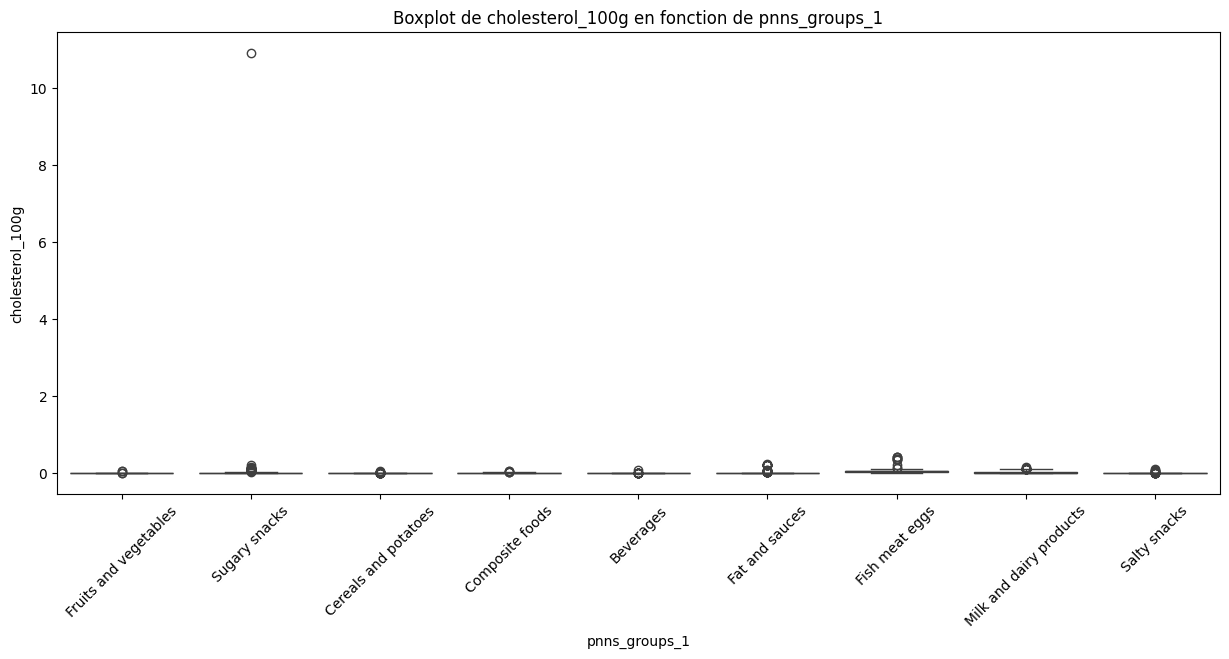

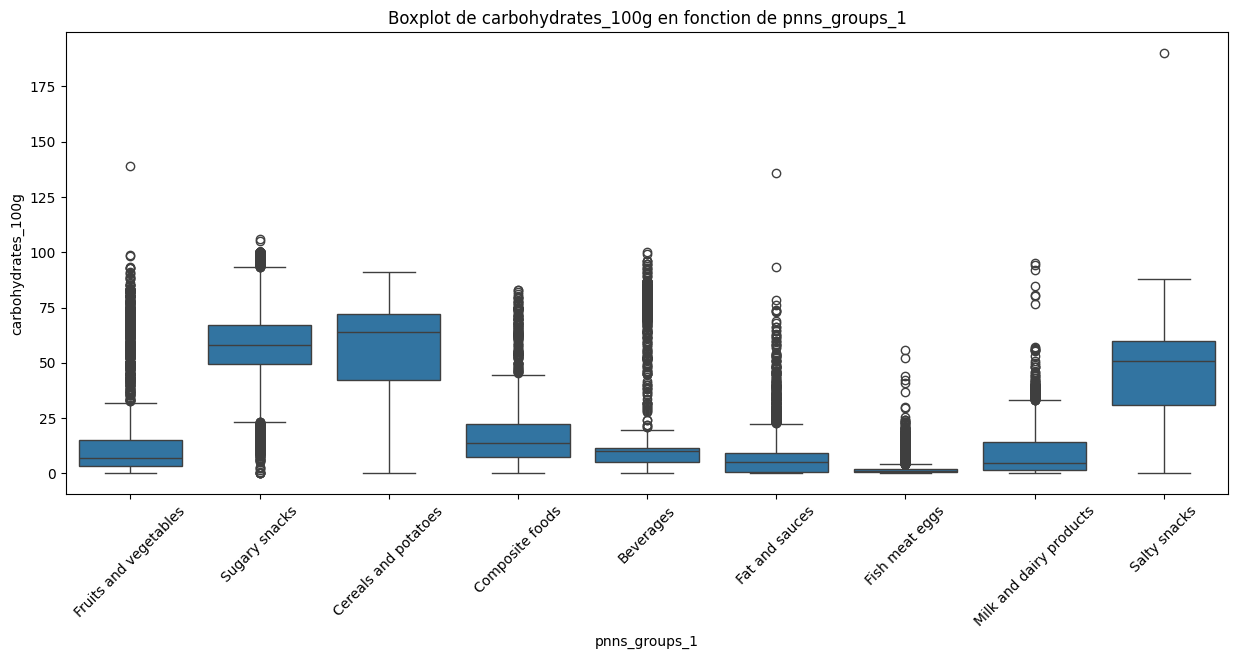

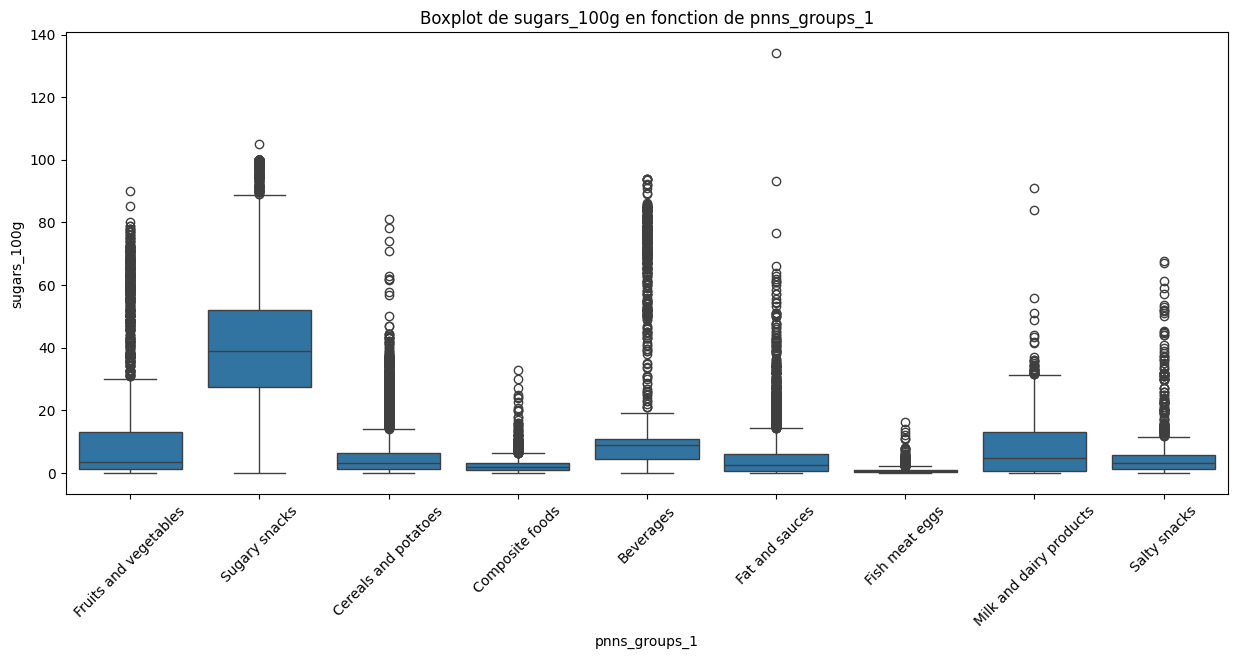

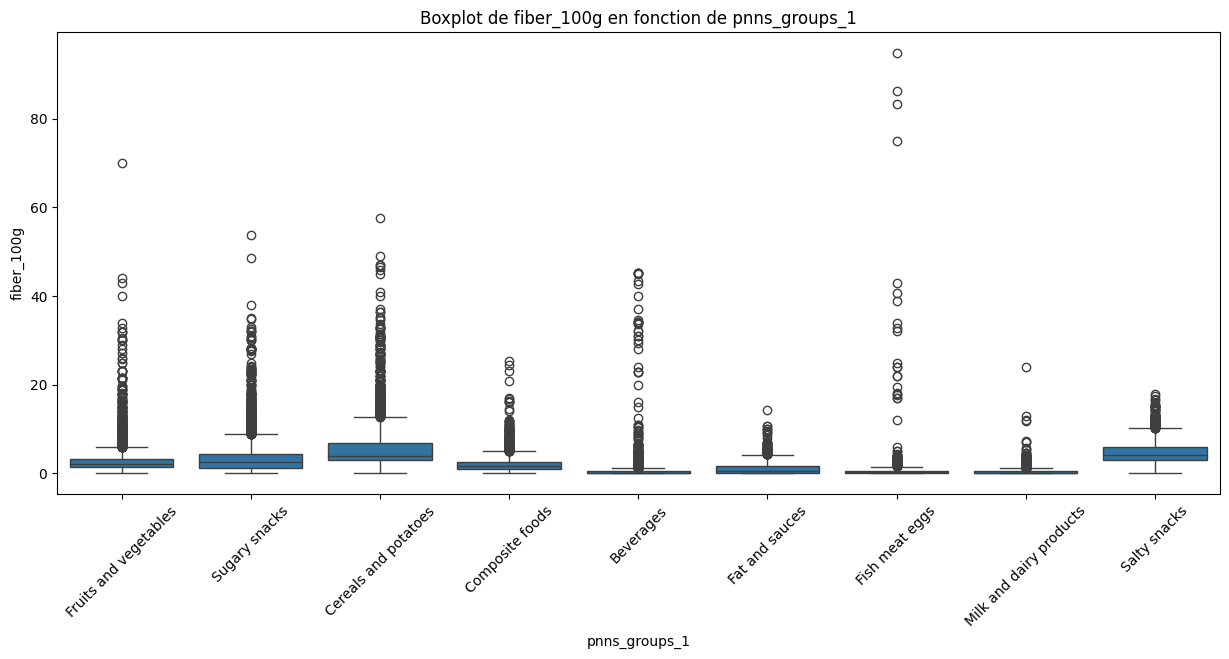

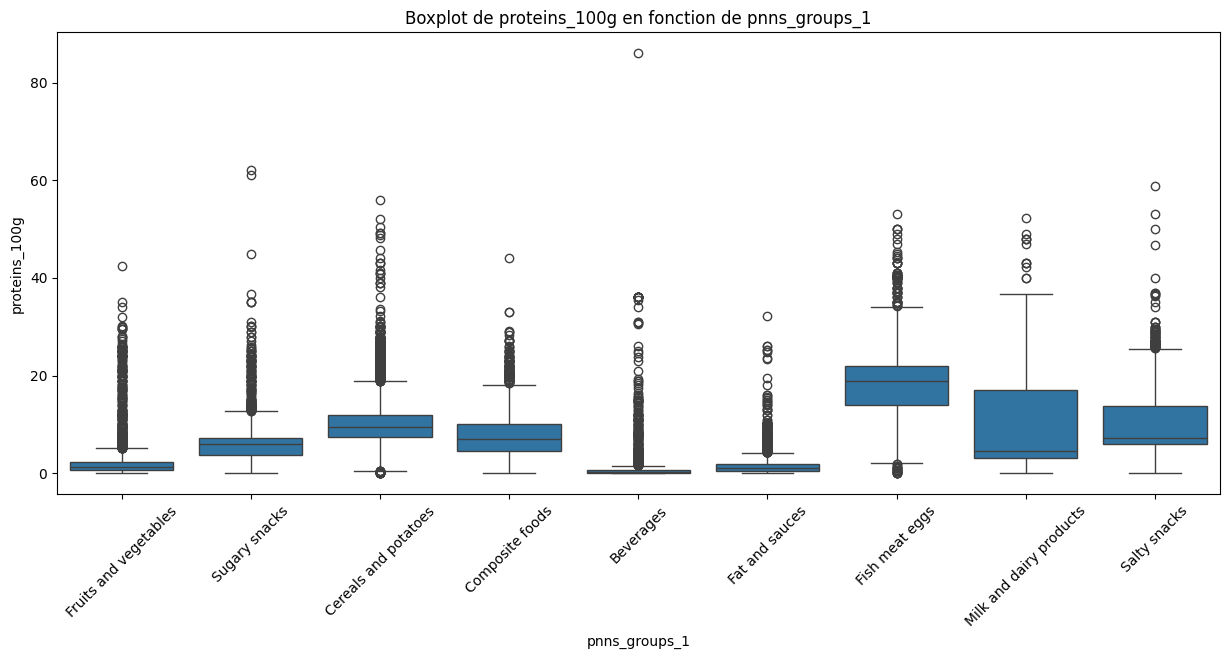

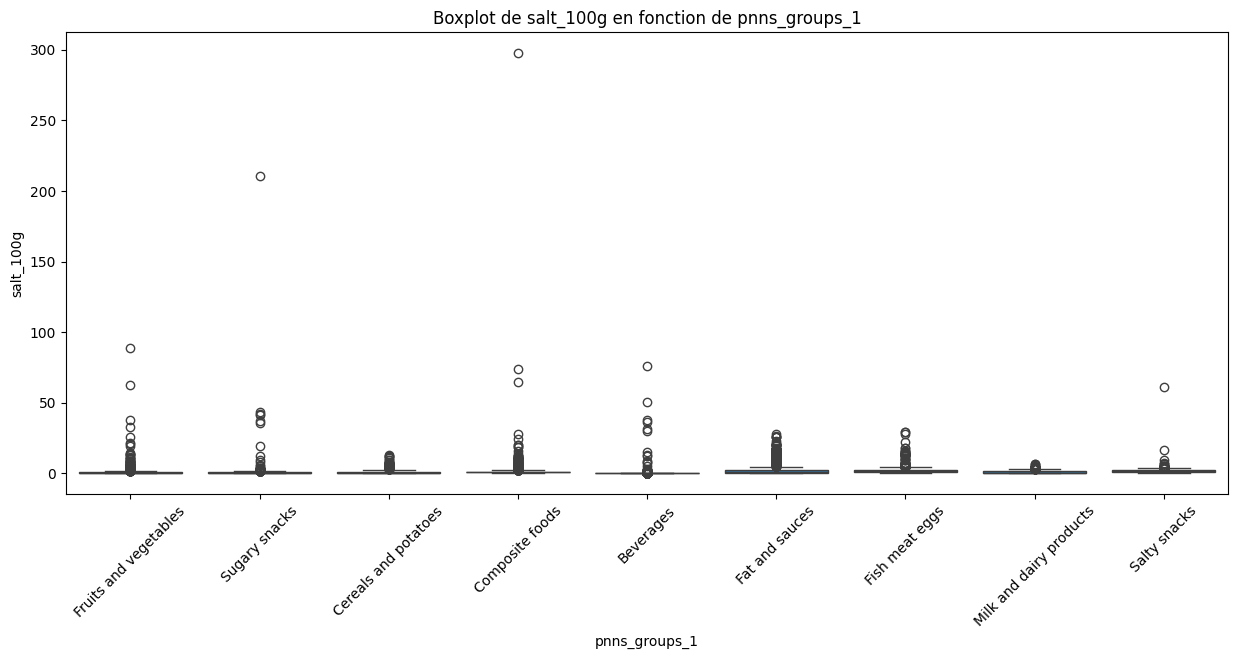

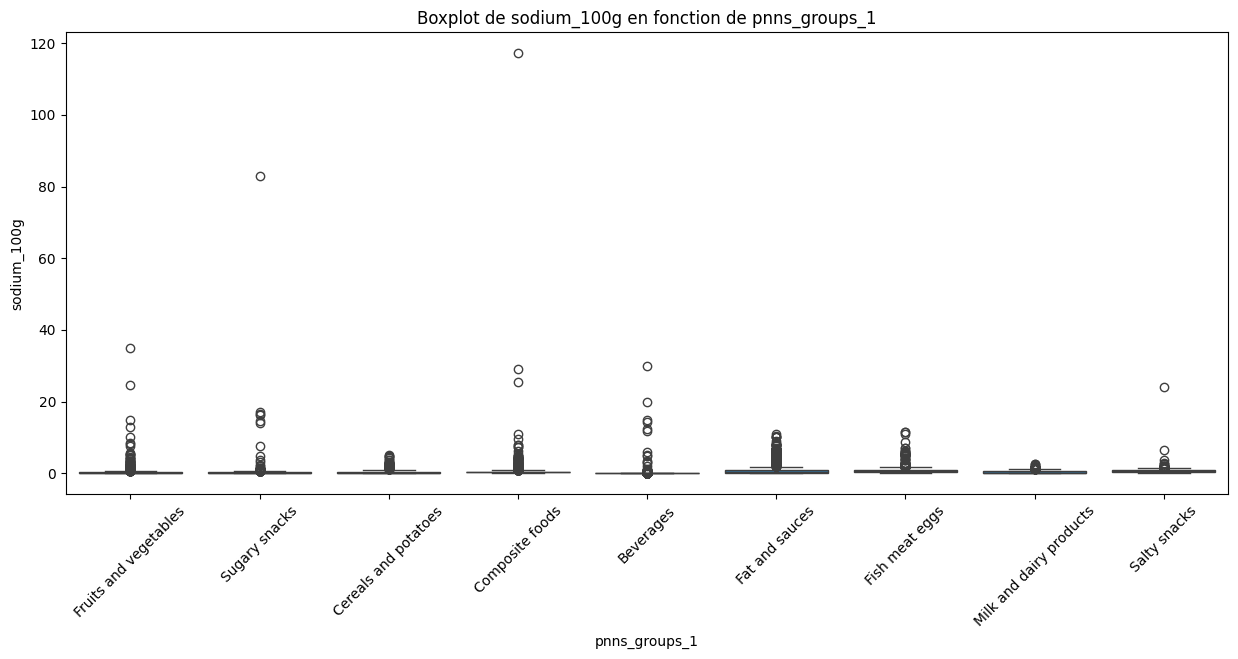

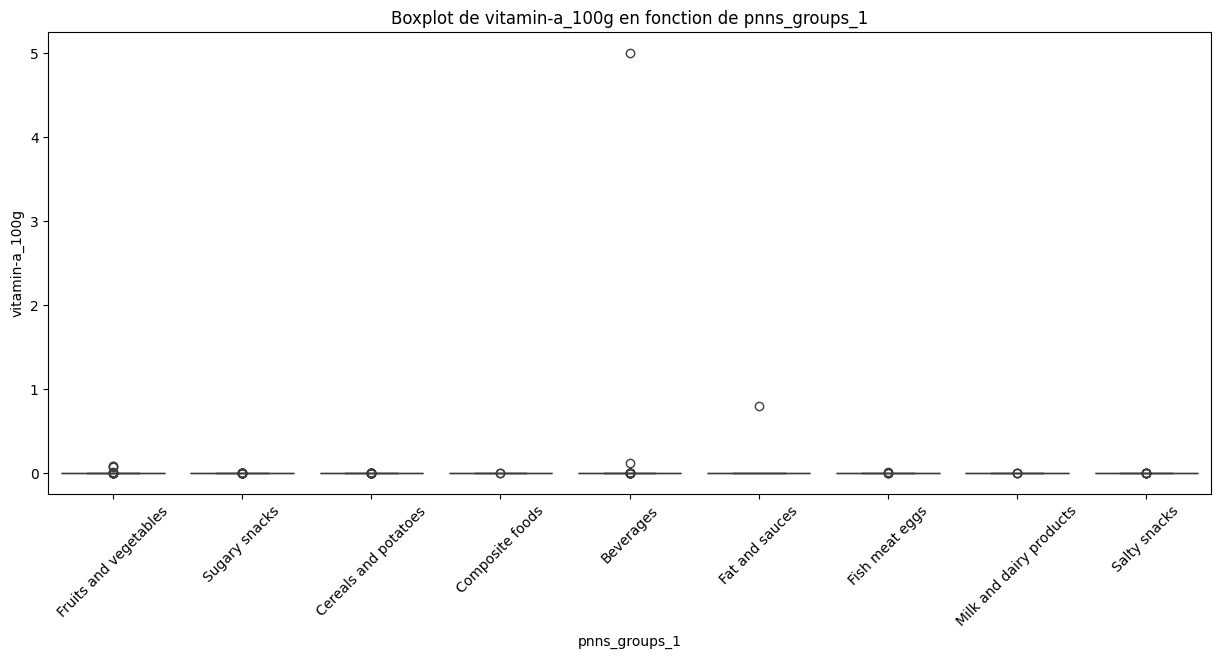

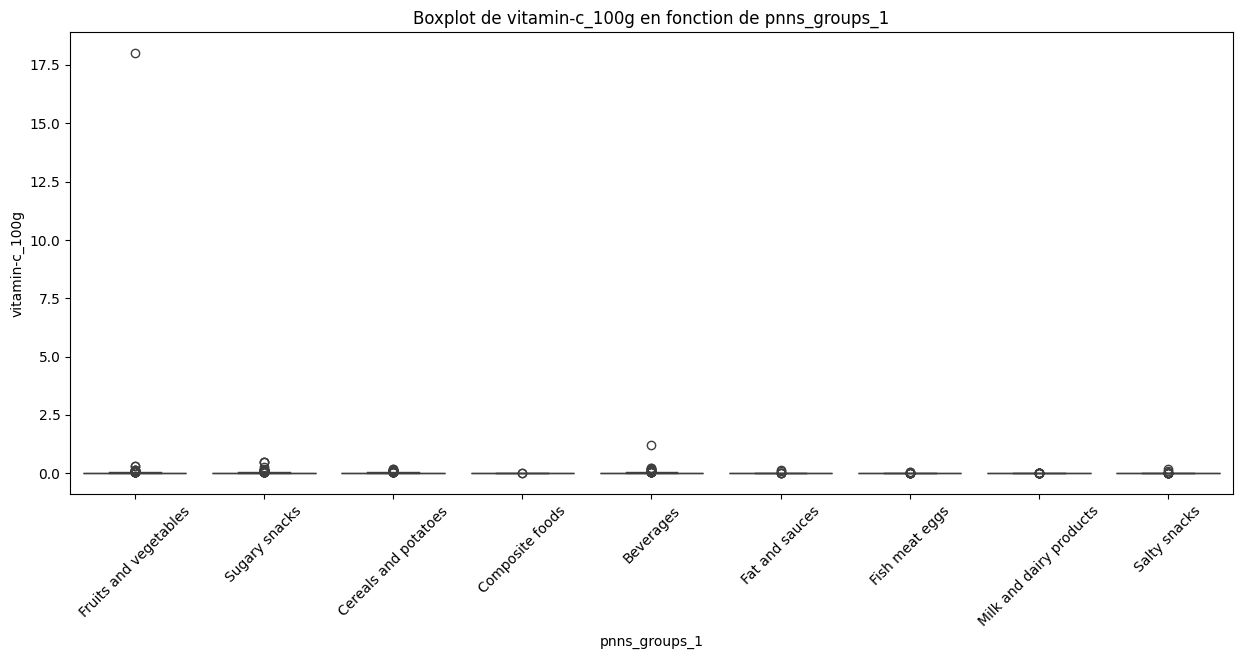

In [37]:
columns_100g = [col for col in df_cleaned.columns if col.endswith('_100g')]
for col in columns_100g:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='pnns_groups_1', y=col, data=df_cleaned)
    plt.title(f'Boxplot de {col} en fonction de pnns_groups_1')
    plt.xlabel('pnns_groups_1')
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


# nettoyage de la colonne ingredients_text


In [16]:
df_ingredients = df_cleaned['ingredients_text']
df_ingredients

0                                                       NaN
1         Bananas, vegetable oil (coconut oil, corn oil ...
2         Peanuts, wheat flour, sugar, rice flour, tapio...
3         Organic hazelnuts, organic cashews, organic wa...
4                                           Organic polenta
                                ...                        
320767                                                  NaN
320768    Organic peppermint, organic lemon grass, organ...
320769                                                  NaN
320770                                                  NaN
320771    Citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 320772, dtype: object

In [17]:
# Fonction pour supprimer le texte entre parenthèses
def remove_parentheses(text):
    if isinstance(text, str):
        return re.sub(r'\([^)]*\)', '', text)  # Supprimer le texte entre parenthèses, y compris les espaces
    else:
        return text  # Retourner la valeur d'origine si ce n'est pas une chaîne de caractères




# Appliquer la fonction à la colonne ingredients_text
df_cleaned['ingredients_text'] = df_cleaned['ingredients_text'].apply(remove_parentheses)

# Afficher le DataFrame après modification
print(df_cleaned['ingredients_text'])
df_cleaned['ingredients_text'].value_counts()

0                                                       NaN
1         Bananas, vegetable oil  sugar, natural banana ...
2         Peanuts, wheat flour, sugar, rice flour, tapio...
3         Organic hazelnuts, organic cashews, organic wa...
4                                           Organic polenta
                                ...                        
320767                                                  NaN
320768    Organic peppermint, organic lemon grass, organ...
320769                                                  NaN
320770                                                  NaN
320771    Citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 320772, dtype: object


ingredients_text
Carbonated water, natural flavor.                                                                                                                                                                          222
Almonds.                                                                                                                                                                                                   219
Extra virgin olive oil.                                                                                                                                                                                    202
Extra virgin olive oil                                                                                                                                                                                     192
Semolina , durum flour , niacin, ferrous sulfate , thiamin mononitrate, riboflavin, folic acid.                                                            

In [18]:

non_alphabetic_pattern = re.compile(r'[^\w\s]')

In [19]:
df_cleaned = df_cleaned[df_cleaned['ingredients_text'].apply(lambda x: isinstance(x, str))]
df_cleaned['has_non_alphabetic_ingredients'] = df_cleaned['ingredients_text'].apply(lambda text: non_alphabetic_pattern.search(text) is not None)

In [24]:
df_predi = df_cleaned.drop(df_cleaned[df_cleaned['has_non_alphabetic_ingredients'] == True].index)

In [25]:
#df d'entrainement avec pnns group
df_train = df_predi.dropna(subset=['pnns_groups_1']) 
#DF sans pnns group
df_missing = df_predi[df['pnns_groups_1'].isna()] 

C:\Users\devil\AppData\Local\Temp\ipykernel_9876\270672394.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [26]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), max_features=1000)

X_train = vectorizer.fit_transform(df_train['ingredients_text'])
X_missing = vectorizer.transform(df_missing['ingredients_text'])

# Encodage des labels
y_train = df_train['pnns_groups_1']

c:\Users\devil\anaconda3\envs\PROJET3\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [27]:
# Initialisation du classifieur KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entraînement du modèle
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [29]:
# Prédictions sur les données manquantes
y_pred_missing = knn.predict(X_missing)

# Remplir les valeurs manquantes dans le DataFrame original
df_predi.loc[df_predi['pnns_groups_1'].isna(), 'pnns_groups_1'] = y_pred_missing

print("\nDataFrame avec valeurs manquantes prédites:")
print(df_predi)


DataFrame avec valeurs manquantes prédites:
                 code                   product_name       generic_name  \
4       0000000016094                Organic Polenta                NaN   
6       0000000016117  Organic Long Grain White Rice                NaN   
10      0000000016612           Organic Adzuki Beans                NaN   
11      0000000016650            Organic Penne Pasta                NaN   
13      0000000016933      Organic Golden Flax Seeds                NaN   
...               ...                            ...                ...   
320691       96087855          Crunchy peanut butter      Peanut butter   
320736  9780201379129                        Attiéké  semoule de manioc   
320743  9791463741241                      Gingembre                NaN   
320754  9876567898765                        nf test                NaN   
320758  9900010011557               Miel de Camargue               Miel   

       quantity    packaging packaging_tags           

In [30]:
df_predi['pnns_groups_1'].value_counts()

pnns_groups_1
Cereals and potatoes       4827
Unknown                    1257
Fruits and vegetables      1142
Beverages                   805
Fish meat eggs              610
Fat and sauces              468
Milk and dairy products     413
Sugary snacks               293
Salty snacks                110
Composite foods               5
Name: count, dtype: int64